In [1]:
!pip -q install pymc_marketing jax jaxlib numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 7.2 MB/s eta 0:00:00


# Importing Necessary Libraries

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Excel file

In [244]:
df=pd.read_excel(r'/content/data.xlsx',parse_dates=['Week_Ending'],thousands=',',decimal='.')
df1=df.copy()
df

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,2662747.5,11599332.5,8.152210e+05,280464068.5,3.861346e+06,6779.5,671.943906
1,Brand A,2022-02-12,FY_2022,MAT_2022,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,17.720041,631368.5,54354.736119,2609978.0,13142160.5,9.236536e+05,235058652.5,3.236218e+06,5110.0,506.472949
2,Brand A,2022-02-19,FY_2022,MAT_2022,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,17.774548,638092.0,54933.564597,2401283.5,12949660.5,9.101243e+05,257480818.0,3.544920e+06,2842.0,281.682216
3,Brand A,2022-02-26,FY_2022,MAT_2022,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,17.771519,538643.0,46371.965227,2396597.0,12401567.5,8.716034e+05,276892035.0,3.812168e+06,3031.0,300.414777
4,Brand A,2022-03-05,FY_2022,MAT_2022,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,17.842527,639628.5,55065.842423,2427106.5,8857677.5,6.225327e+05,193081850.5,2.658294e+06,3395.0,336.492302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Brand A,2024-05-04,FY_2024,MAT_2024,4.329954e+07,0.072005,0.048122,0,24330285.0,1128.5190,18.646429,422376.5,36362.541369,1557787.0,17464296.5,1.227421e+06,99109724.0,1.364513e+06,0.0,0.000000
118,Brand A,2024-05-11,FY_2024,MAT_2024,4.231364e+07,0.052595,0.342303,0,24294714.5,1123.4335,18.697309,273955.5,23584.925302,1554808.5,11039213.5,7.758548e+05,94435820.5,1.300164e+06,0.0,0.000000
119,Brand A,2024-05-18,FY_2024,MAT_2024,4.011042e+07,0.051634,0.136933,0,24298113.0,1123.4335,18.695423,289660.0,24936.931228,1517523.0,10867983.0,7.638205e+05,90986511.0,1.252675e+06,0.0,0.000000
120,Brand A,2024-05-25,FY_2024,MAT_2024,3.783654e+07,0.058609,0.137453,0,24399693.5,1123.4335,18.709714,237674.5,20461.481258,1427023.5,10679399.5,7.505665e+05,97938928.5,1.348394e+06,0.0,0.000000


# Data Exploration

In [130]:
print(f'The shape of the data is {df.shape}')
print(f'The size of the data is {df.size}')
print(f'The columns of the data are {df.columns}')

The shape of the data is (122, 20)
The size of the data is 2440
The columns of the data are Index(['Department', 'Week_Ending', 'Year', 'MAT', 'Sales', 'Discount1',
       'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price',
       'Average Price', 'Email Clicks', 'Email Spends',
       'Organic Search Impressions', 'Modular Video Impressions',
       'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends',
       'Paid Search Impressions', 'Paid Search Spends'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Department                  122 non-null    object        
 1   Week_Ending                 122 non-null    datetime64[ns]
 2   Year                        122 non-null    object        
 3   MAT                         122 non-null    object        
 4   Sales                       122 non-null    float64       
 5   Discount1                   122 non-null    float64       
 6   Discount2                   122 non-null    float64       
 7   Holiday Dummy               122 non-null    int64         
 8   Total SKU                   122 non-null    float64       
 9   Gasoline Price              122 non-null    float64       
 10  Average Price               122 non-null    float64       
 11  Email Clicks                122 non-null    float64       

In [8]:
df.describe(include='float64')

,Sales,Discount1,Discount2,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
count,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,4.716817e+07,0.045865,0.048454,2.733039e+07,1141.034570,18.232506,4.383132e+05,37734.537898,1.973459e+06,1.342260e+07,9.433634e+05,2.028083e+08,2.792205e+06,1522.872951,150.938152
std,4.904374e+06,0.020532,0.066932,1.986457e+06,128.779133,0.235631,1.746694e+05,15037.350764,3.844069e+05,6.033649e+06,4.240552e+05,7.892941e+07,1.086677e+06,2051.580642,203.340528
min,3.158512e+07,0.013620,0.002513,2.377588e+07,966.010500,17.716258,1.655045e+05,14248.340587,8.734215e+05,1.924108e+06,1.352296e+05,6.940367e+07,9.555292e+05,0.000000,0.000000
25%,4.444759e+07,0.032922,0.007754,2.590976e+07,1051.745625,18.051530,3.169416e+05,27285.615915,1.708429e+06,9.235256e+06,6.490696e+05,1.399515e+08,1.926810e+06,0.000000,0.000000
50%,4.692418e+07,0.041603,0.017871,2.687210e+07,1114.687000,18.210772,4.256770e+05,36646.682574,1.943811e+06,1.191968e+07,8.377356e+05,1.858422e+08,2.558620e+06,490.000000,48.565899
75%,5.047277e+07,0.057146,0.057452,2.925184e+07,1186.125500,18.414389,5.104199e+05,43942.226474,2.220258e+06,1.749417e+07,1.229520e+06,2.727134e+08,3.754638e+06,2648.625000,262.516030
max,5.839206e+07,0.178189,0.342303,3.109905e+07,1505.497000,18.709714,1.254225e+06,107976.671165,3.125528e+06,3.799969e+07,2.670683e+06,3.689925e+08,5.080180e+06,10363.500000,1027.168769


In [9]:
df.describe(include='object')

,Department,Year,MAT
count,122,122,122
unique,1,3,3
top,Brand A,FY_2023,MAT_2023
freq,122,53,52


In [10]:
# There are missing values in the columns like paid Search Impressions, paid Search Spends
df.isnull().sum()

,0
Department,0
Week_Ending,0
Year,0
MAT,0
Sales,0
Discount1,0
Discount2,0
Holiday Dummy,0
Total SKU,0
Gasoline Price,0


In [14]:
# There are no duplicate values in the dataset.
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

### 1) Sales Time Series Trend & Seasonality

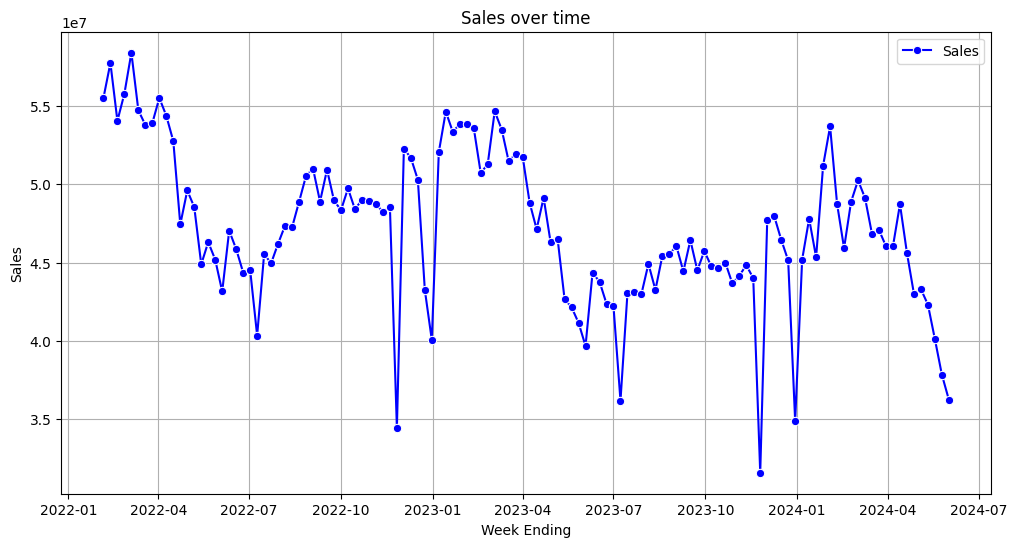

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Week_Ending',y='Sales',marker='o',color='blue')
plt.title('Sales over time')
plt.xlabel('Week Ending')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.grid(True)

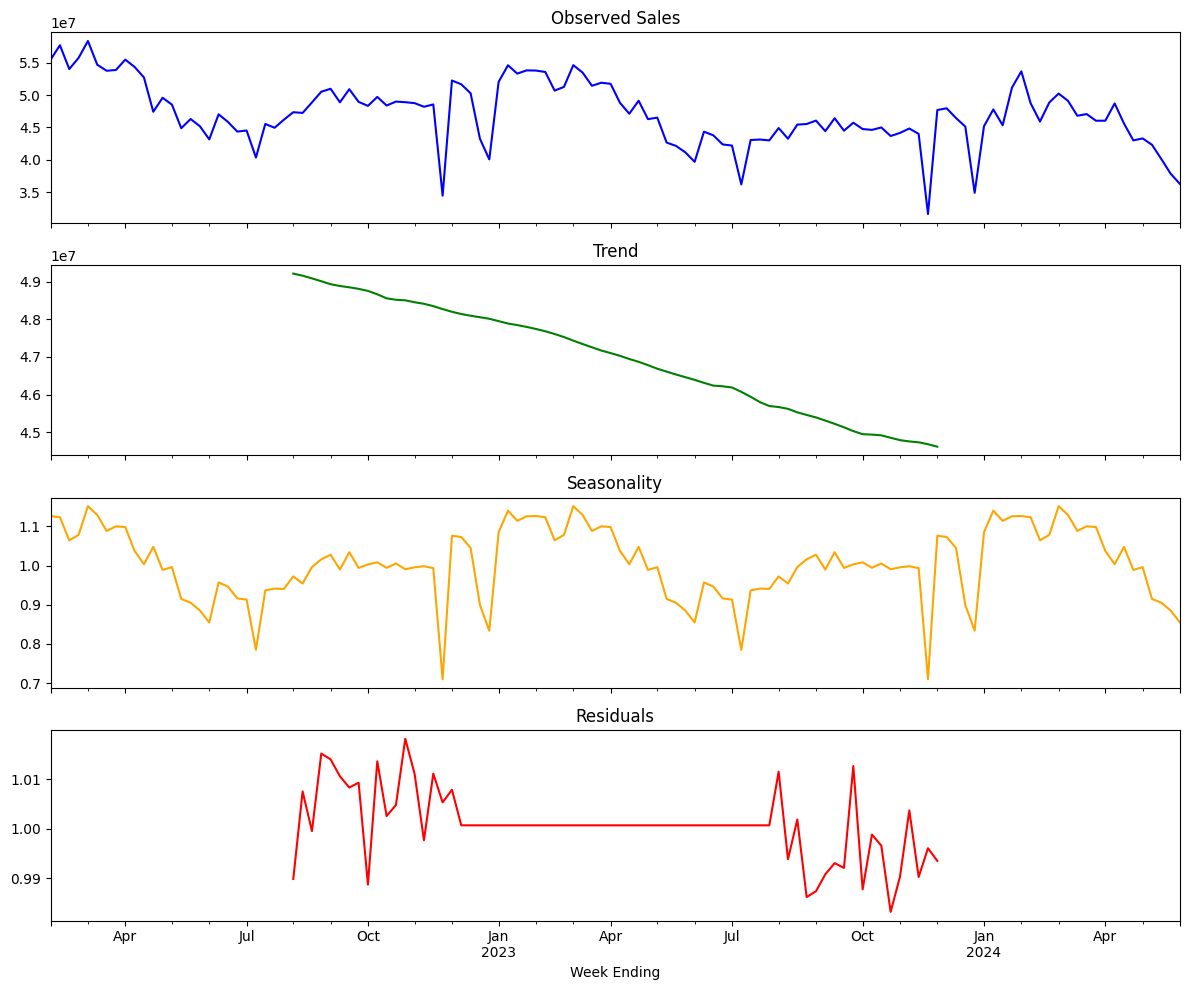

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_decomposition = seasonal_decompose(df.set_index("Week_Ending")["Sales"], model="multiplicative", period=52)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
sales_decomposition.observed.plot(ax=axes[0], title="Observed Sales", color="blue")
sales_decomposition.trend.plot(ax=axes[1], title="Trend", color="green")
sales_decomposition.seasonal.plot(ax=axes[2], title="Seasonality", color="orange")
sales_decomposition.resid.plot(ax=axes[3], title="Residuals", color="red")
plt.xlabel("Week Ending")
plt.tight_layout()
plt.show()

### Trend: The negative value of slope -63,471.23 indicates that, on average, Sales decrease by about 63,471 dollars per time step (week).

* **Root Cause Analysis:** This steep negative trend indicates potential issues like market saturation, increased competition, shifting consumer preferences.
* **Resource Allocation:** Reallocate marketing budgets to focus on customer retention and acquisition efforts, or pivot to product/service improvements.

In [21]:
from sklearn.linear_model import LinearRegression

df1['time_index'] = np.arange(len(df1))
trend_model = LinearRegression().fit(df1[['time_index']], df1['Sales'])
trend_slope = trend_model.coef_[0]
print(f'The slope of the trend line is: {trend_slope}')

The slope of the trend line is: -63471.2307783831


### Seasonality: Based on the dominant frequency of 0.04098... cycles/week found in the data, the strongest cyclical component repeats approximately every 24.4 weeks.

* **Promotional Timing:** Align marketing campaigns and promotions with the peaks of this seasonal cycle.
* **Pricing Strategies:** Should consider seasonal pricing adjustments (discounts during low sales periods, premium pricing during peaks) to maximize revenue.

In [22]:
from scipy.signal import periodogram
frequencies, spectrum = periodogram(df1['Sales'], detrend='linear')
dominant_frequency = frequencies[np.argmax(spectrum)]
period=1/dominant_frequency
print(f'The period of the dominant frequency is: {period} weeks')

The period of the dominant frequency is: 24.4 weeks


* **Residual:** The residual analysis indicates a good overall fit of the multiplicative model (mean residual close to 1) with a reasonable level of unexplained variability (standard deviation of 0.0610), but highlights the presence of some larger deviations (up to 1.20) suggesting potential outliers or uncaptured factors in the sales data.

In [23]:
residuals = sales_decomposition.resid.dropna()
residual_stats = {
    'Mean': residuals.mean(),
    'StdDev': residuals.std(),
    'Max_Deviation': np.abs(residuals).max()
}
residual_stats

{'Mean': np.float64(1.0006582033041114),
 'StdDev': 0.007063705240573483,
 'Max_Deviation': 1.0181517157071192}

# 2) Marketing Spend Analysis


In [24]:
total_spend=df[['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends']].sum(axis=0).sum()
print(f'The total amount spent on all channels is: {total_spend}')

The total amount spent on all channels is: 460361362.3531999


In [25]:
total_sales=df['Sales'].sum()
print(f'The total sales is: {total_sales}')

The total sales is: 5754517029.415001


* The total sales is approximately 12.5 times the total spend, indicating a significant return on investment (ROI). But there may be other reasons why the sales is high.

In [26]:
return_on_investment=total_sales/total_spend
print(f'The return on investment is: {return_on_investment:.2f}')

The return on investment is: 12.50


* The marketing budget is heavily skewed towards Paid Social Spends (74%) and Modular Video Spends (25%), with minimal allocation towards Email Marketing (1%) and almost no investment in Paid Search Spends (0.004%).

In [27]:
channels=['Paid Search Spends','Email Spends', 'Paid Social Spends', 'Modular Video Spends', ]
total_spend_per_channel=df[channels].sum(axis=0)
total_spend_per_channel

,0
Paid Search Spends,1.841445e+04
Email Spends,4.603614e+06
Paid Social Spends,3.406490e+08
Modular Video Spends,1.150903e+08


In [28]:
import plotly.express as px

fig = px.pie(total_spend_per_channel, values=total_spend_per_channel.values, names=total_spend_per_channel.index, title='Spend Channel-wise')
fig.show()

In [29]:
mean_spend=df[['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends']].mean(axis=0)
mean_spend

,0
Paid Search Spends,1.509382e+02
Paid Social Spends,2.792205e+06
Modular Video Spends,9.433634e+05
Email Spends,3.773454e+04


# 3) Rolling Statistics (Mean & Std Dev)

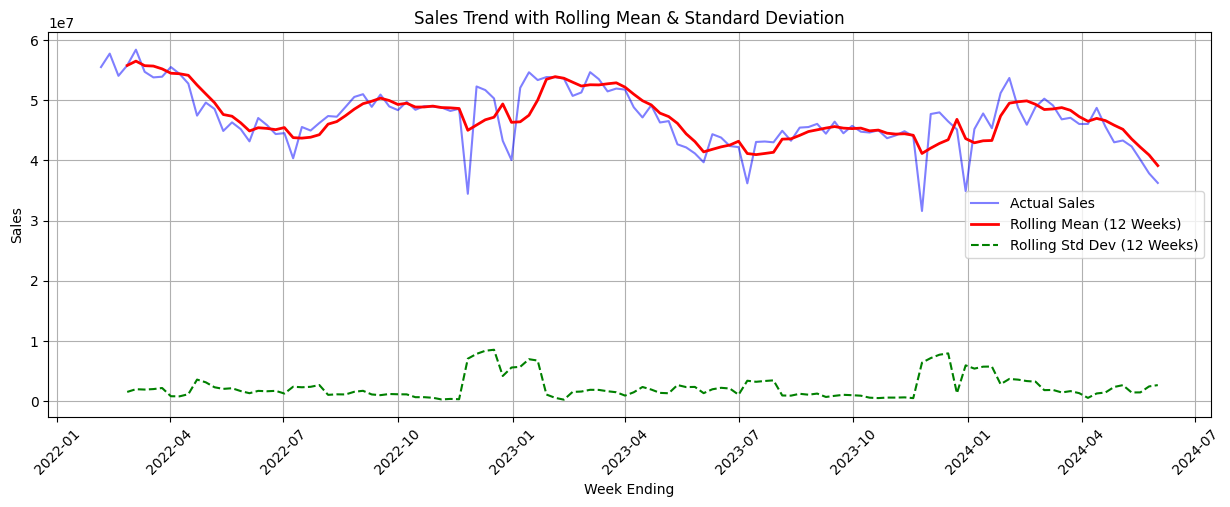

In [30]:
window_size = 4
df1["Sales_Rolling_Mean"] = df["Sales"].rolling(window=window_size).mean()
df1["Sales_Rolling_Std"] = df["Sales"].rolling(window=window_size).std()

plt.figure(figsize=(15, 5))
plt.plot(df1["Week_Ending"], df1["Sales"], label="Actual Sales", alpha=0.5, color="blue")
plt.plot(df1["Week_Ending"], df1["Sales_Rolling_Mean"], label="Rolling Mean (12 Weeks)", color="red", linewidth=2)
plt.plot(df1["Week_Ending"], df1["Sales_Rolling_Std"], label="Rolling Std Dev (12 Weeks)", color="green", linestyle="dashed")
plt.xlabel("Week Ending")
plt.ylabel("Sales")
plt.title("Sales Trend with Rolling Mean & Standard Deviation")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* The rolling mean decreased by 0.27% weekly on average
* We need to investigate whether this is due to seasonality or requires strategy adjustment.

In [31]:
mean_trend = df1["Sales_Rolling_Mean"].pct_change().mean()
print(f"Average Trend Direction: {'Upward' if mean_trend > 0 else 'Downward'} ({mean_trend:.2%} weekly change)")

Average Trend Direction: Downward (-0.27% weekly change)


* Sales variability fluctuates dramatically between periods.
* Also suggets that November, December, January months high sales volatality. We must align marketing flexibility with volatile periods.

In [32]:
volatility_ratio = df1["Sales_Rolling_Std"].max() / df1["Sales_Rolling_Std"].min()
print(f"Volatility Range is {volatility_ratio:.1f}x from the calmest to the most volatile period.")

Volatility Range is 36.6x from the calmest to the most volatile period.


Text(0, 0.5, 'Sales Rolling Standard Deviation')

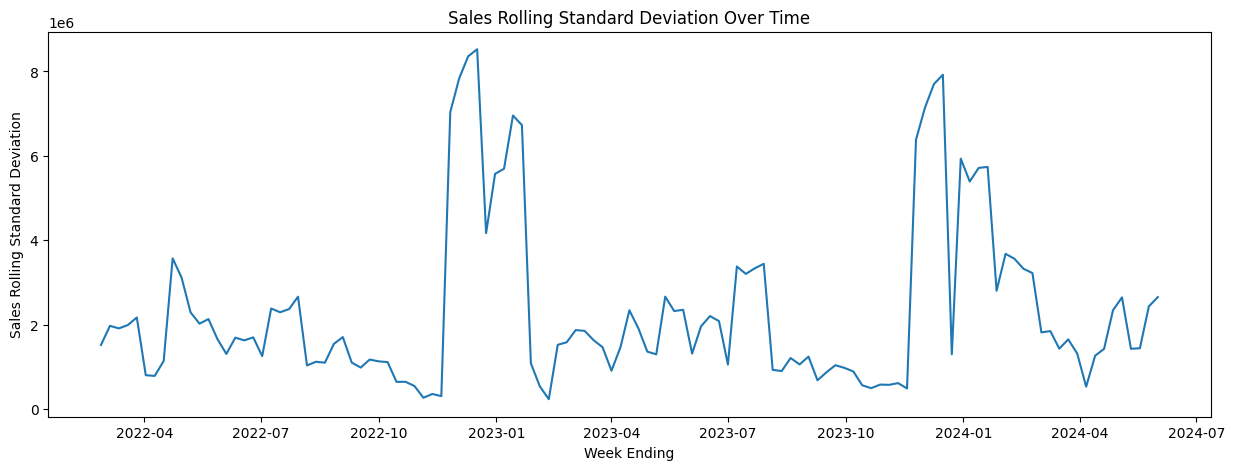

In [33]:
plt.figure(figsize=(15, 5))

sns.lineplot(data=df1, x='Week_Ending', y='Sales_Rolling_Std')
plt.title('Sales Rolling Standard Deviation Over Time')
plt.xlabel('Week Ending')
plt.ylabel('Sales Rolling Standard Deviation')

# 4) Distribution Anaysis of Sales and Marketing Spends

* **Sales:** Consistent performance with a slight left skew and moderate leptokurtosis indicates stable sales with a few lower-than-average periods.
* **Paid Social Spends:** A mild right skew and platykurtic distribution show stable, predictable spending without extreme values.
* **Email Spends:** High right skew and leptokurtosis reveal sporadic, unusually high spending events.
* **Modular Video Spends:** Moderately right skewed and leptokurtic, suggesting occasional high spend spikes.

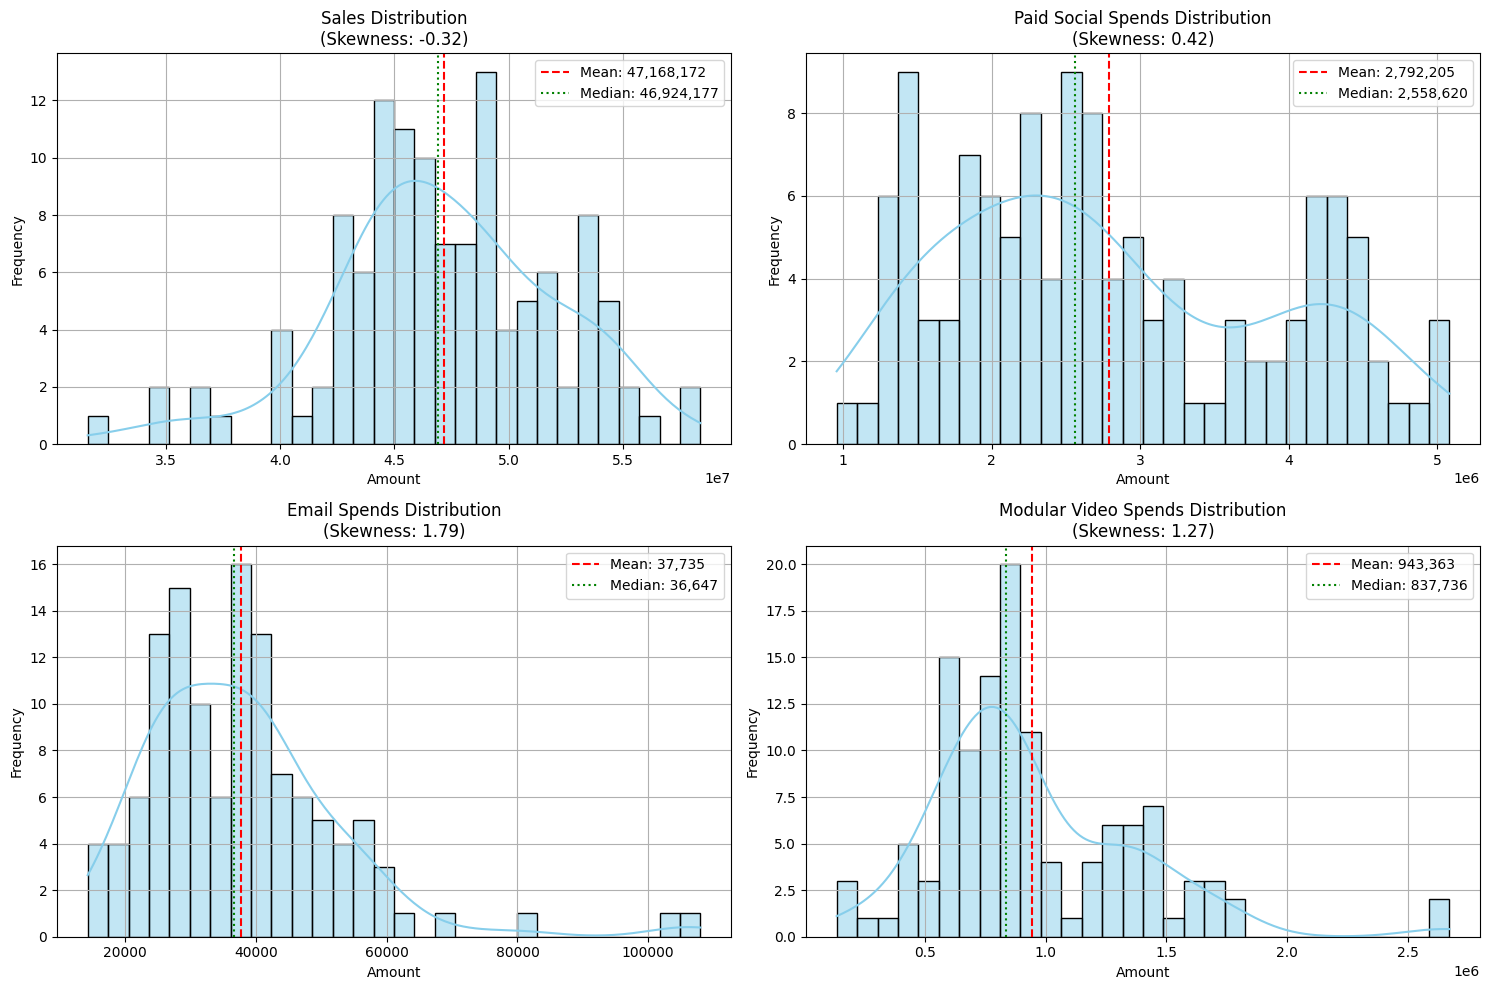

In [34]:
numeric_cols = ['Sales', 'Paid Social Spends', 'Email Spends', 'Modular Video Spends']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)

    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.axvline(df[col].mean(), color='r', linestyle='--', label=f'Mean: {df[col].mean():,.0f}')
    plt.axvline(df[col].median(), color='g', linestyle=':', label=f'Median: {df[col].median():,.0f}')

    plt.title(f'{col} Distribution\n(Skewness: {df[col].skew():.2f})')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:
print("\nDistribution Characteristics:")

for col in numeric_cols:
    skew = df[col].skew()
    kurtosis=df[col].kurtosis()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    outliers = df[(df[col] < (df[col].quantile(0.25) - 1.5*iqr)) | (df[col] > (df[col].quantile(0.75) + 1.5*iqr))]

    print(f"""
    {col}:
    - Skewness: {skew:.2f} ({'Right' if skew > 0 else 'Left'} skewed)
    - Kurtosis: {kurtosis:.2f} ({'Leptokurtic' if kurtosis > 0 else 'Platykurtic'})
    - Outliers: {len(outliers)} instances
    - 95% Range: {df[col].quantile(0.05):,.0f} to {df[col].quantile(0.95):,.0f}""")


Distribution Characteristics:

    Sales:
    - Skewness: -0.32 (Left skewed)
    - Kurtosis: 0.53 (Leptokurtic)
    - Outliers: 3 instances
    - 95% Range: 39,695,867 to 54,652,843

    Paid Social Spends:
    - Skewness: 0.42 (Right skewed)
    - Kurtosis: -0.96 (Platykurtic)
    - Outliers: 0 instances
    - 95% Range: 1,356,472 to 4,536,938

    Email Spends:
    - Skewness: 1.79 (Right skewed)
    - Kurtosis: 5.88 (Leptokurtic)
    - Outliers: 4 instances
    - 95% Range: 19,810 to 60,387

    Modular Video Spends:
    - Skewness: 1.27 (Right skewed)
    - Kurtosis: 2.97 (Leptokurtic)
    - Outliers: 2 instances
    - 95% Range: 455,353 to 1,669,684


# 5) Correlation Heatmap

* The strongest drivers of sales are Paid Search and Organic Search Impressions, with correlation coefficients of 0.55 and 0.56, respectively. This indicates a strong positive relationship between these channels and sales.
*  In contrast, Paid Social has a relatively weaker impact, with a correlation coefficient of 0.39 for both impressions and spends. Meanwhile, Modular Video appears to have a negligible effect on sales, with a correlation coefficient of just 0.058.
*  By using **VIF(Variance Inflation Factor)** we can detect the multicollinearity that exists in the data, higher values indicate stronger correlation with other predictors. Hence we can remove "Total SKU", "Average Price" due to their extremely high VIF values, suggesting they are highly correlated with other variables.

In [36]:
num_all=['Sales','Organic Search Impressions','Modular Video Impressions','Modular Video Spends','Paid Social Impressions','Paid Social Spends','Paid Search Impressions','Paid Search Spends','Average Price','Total SKU']

<Axes: >

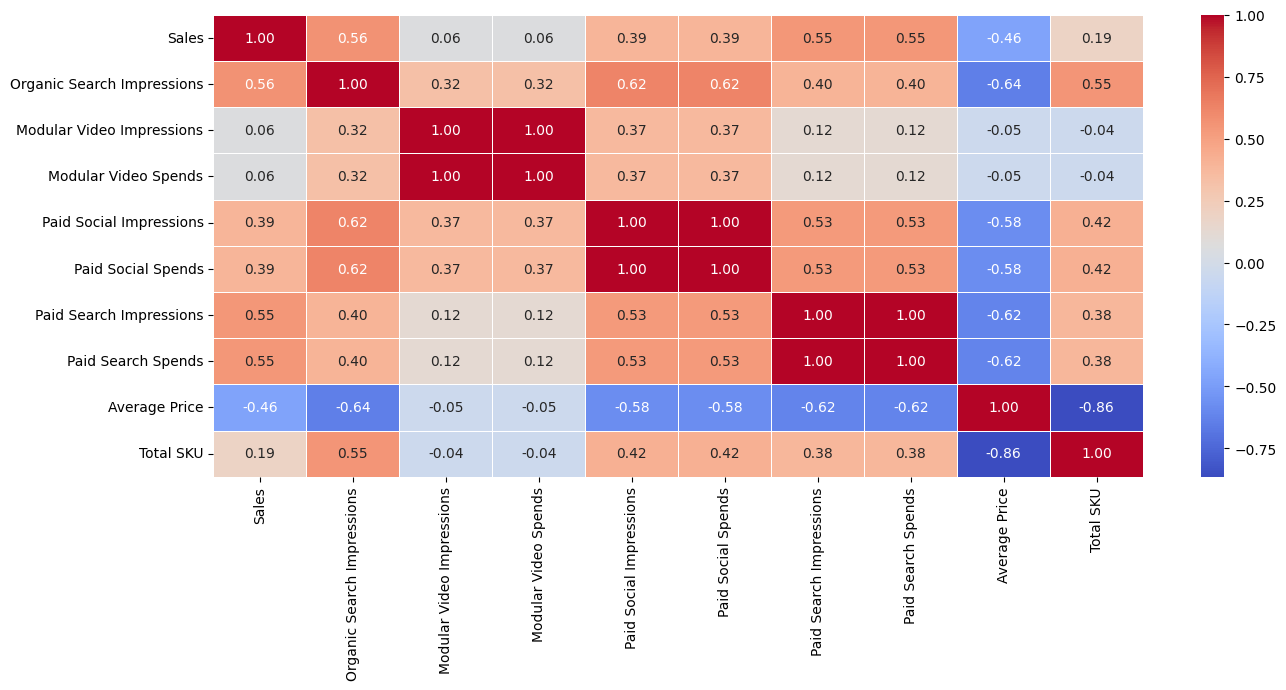

In [37]:
plt.figure(figsize=(15,6))
correlation_matrix=df[num_all].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Variable"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

vif_data = df[['Paid Social Spends', 'Paid Search Spends',
            'Email Spends', 'Modular Video Spends',
            'Discount1', 'Discount2', 'Average Price',
            'Gasoline Price', 'Total SKU']]

calculate_vif(vif_data)

,Variable,VIF
0,Paid Social Spends,15.081407
1,Paid Search Spends,2.321037
2,Email Spends,8.814683
3,Modular Video Spends,7.576443
4,Discount1,7.044350
5,Discount2,1.867361
6,Average Price,227.418337
7,Gasoline Price,164.842135
8,Total SKU,495.901829


In [43]:
# df.drop(['Average Price','Total SKU'],axis=1,inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Variable"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

vif_data = df[['Paid Social Spends', 'Paid Search Spends',
            'Email Spends', 'Modular Video Spends',
            'Discount1', 'Discount2']]

calculate_vif(vif_data)

,Variable,VIF
0,Paid Social Spends,10.521311
1,Paid Search Spends,2.127847
2,Email Spends,4.856765
3,Modular Video Spends,6.800157
4,Discount1,5.432140
5,Discount2,1.483140


# 6) Missing Value and Outlier Detection

* In marketing mix modeling, the missing values in the Paid Search Impressions and Paid Search Spends columns indicate that there was no activity for those weeks (rather than a data collection error), the appropriate approach is to impute them as 0.
* Also for the Holiday Dummy column, if data for a particular row are missing, it often means that there was no holiday or event scheduled, so we can impute it with 0.

### Creating interaction terms:

* Interaction terms are new variables created by multiplying two or more existing variables in a model.
* Without interaction terms, the model assumes the effect of Paid Social Spends is the same regardless of holidays.
  
* With interaction terms, the model can differentiate:
    * Effect of Paid Social Spends on non-holidays.
    * Effect of Paid Social Spends during holidays.

In [44]:
# Outlier detection using IQR method
def detect_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers

outliers_sales = detect_outliers_iqr(df, "Sales")
outliers_sales

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
42,Brand A,2022-11-26,FY_2022,MAT_2023,3.444005e+07,0.049173,0.005968,1,29370250.0,1143.2715,18.114693,1254225.0,107976.671165,2032915.5,11470452.0,8.061630e+05,207948002.5,2.862967e+06,1631.0,161.655065
94,Brand A,2023-11-25,FY_2023,MAT_2024,3.158512e+07,0.039243,0.022613,1,26526125.5,1041.5930,18.396413,708057.0,60956.876043,1404945.5,37999692.5,2.670683e+06,69403666.5,9.555292e+05,0.0,0.000000
99,Brand A,2023-12-30,FY_2023,MAT_2024,3.488112e+07,0.048346,0.003681,0,25882622.5,981.0115,18.436381,331506.0,28539.468079,1319136.0,13831520.5,9.721030e+05,118145272.0,1.626589e+06,0.0,0.000000


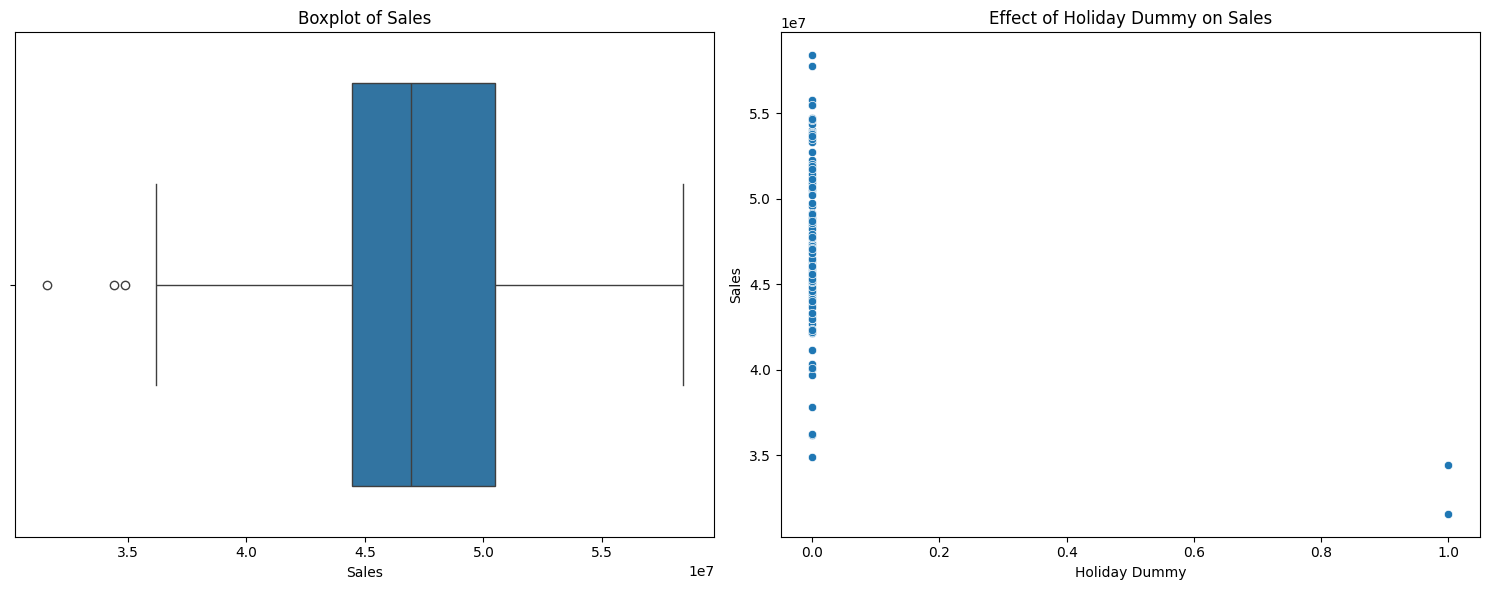

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(ax=axes[0], data=df, x='Sales')
axes[0].set_title('Boxplot of Sales')

sns.scatterplot(ax=axes[1], data=df, x='Holiday Dummy', y='Sales')
axes[1].set_title('Effect of Holiday Dummy on Sales')
axes[1].set_xlabel('Holiday Dummy')
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# 7) Lag Analysis

* The lag plot shows a clear positive correlation, meaning past sales values influence future sales. This suggests a carryover effect, which is useful for Marketing Mix Models to account for past marketing actions.

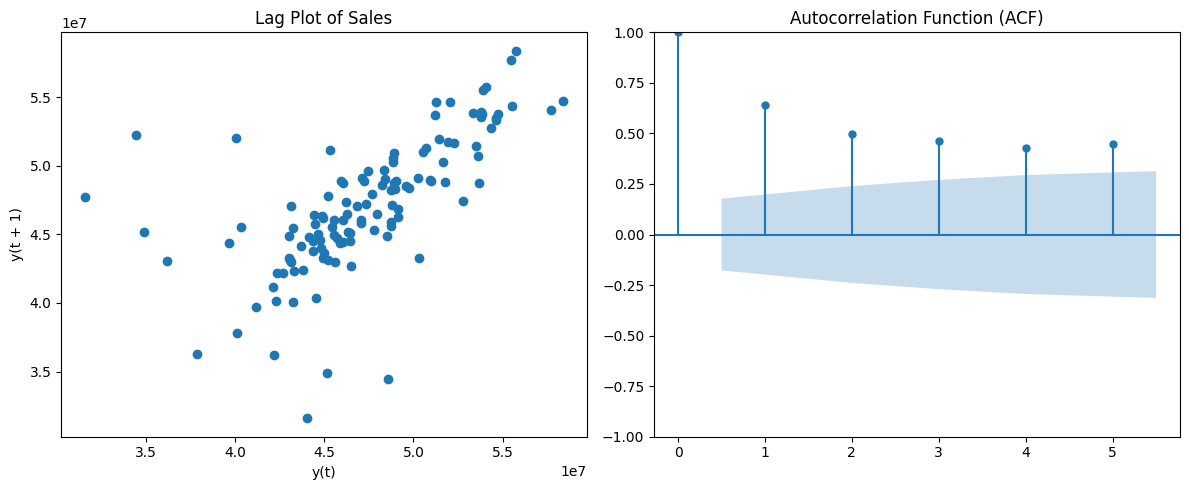

In [46]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

lag_plot(df["Sales"], ax=axes[0])
axes[0].set_title("Lag Plot of Sales")

plot_acf(df["Sales"], lags=5, alpha=0.05, ax=axes[1])
axes[1].set_title("Autocorrelation Function (ACF)")

plt.tight_layout()
plt.show()

# 8) Cross Correlation

* Paid Social: Peak correlation at Lag 0 → Immediate impact on sales (no delay).
* Paid Search: Peak correlation at Lag +2 → Delayed impact, taking ~2 weeks to influence sales.
* Negative Lags: Weak correlation when spends follow sales (e.g., reactive budget increases after sales spikes).

In [48]:
def cross_corr_fixed(series1, series2, max_lag=12):
    lags = np.arange(-max_lag, max_lag + 1)
    corr_values = []

    for lag in lags:
        if lag < 0:
            s1 = series1[:lag]
            s2 = series2[-lag:]
        elif lag > 0:
            s1 = series1[lag:]
            s2 = series2[:-lag]
        else:
            s1, s2 = series1, series2

        if len(s1) < 2 or len(s2) < 2:
            corr = np.nan
        else:
            corr = np.corrcoef(s1, s2)[0, 1]

        corr_values.append(corr)

    return lags, corr_values

lags, cross_corr_social = cross_corr_fixed(df["Paid Social Spends"], df["Sales"])
lags, cross_corr_search = cross_corr_fixed(df["Paid Search Spends"], df["Sales"])

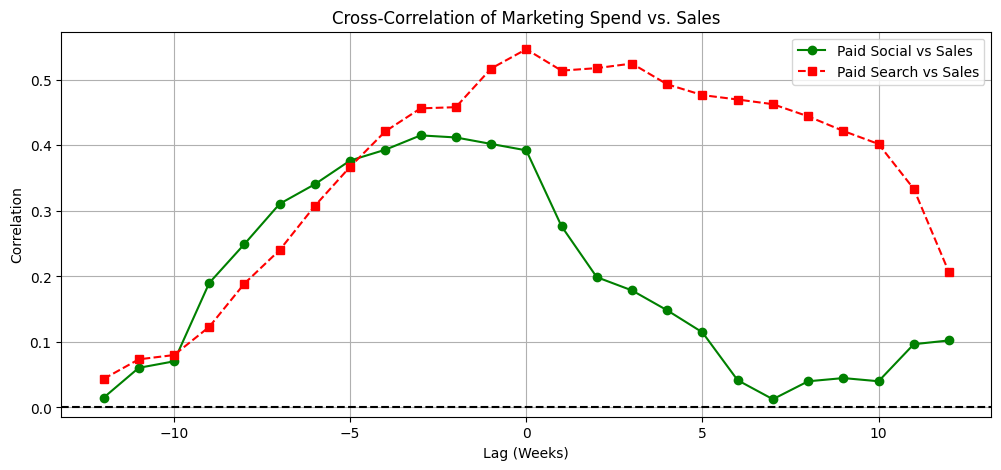

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(lags, cross_corr_social, marker="o", linestyle="-", label="Paid Social vs Sales", color="green")
plt.plot(lags, cross_corr_search, marker="s", linestyle="--", label="Paid Search vs Sales", color="red")
plt.axhline(0, color="black", linestyle="dashed")
plt.xlabel("Lag (Weeks)")
plt.ylabel("Correlation")
plt.title("Cross-Correlation of Marketing Spend vs. Sales")
plt.legend()
plt.grid(True)
plt.show()

In [336]:
df=pd.read_excel(r'/content/data.xlsx',parse_dates=['Week_Ending'],thousands=',',decimal='.')
data=df.copy()

In [339]:
channels = ["Email Spends", "Modular Video Spends", "Paid Social Spends"]
for col in channels:
    data[f"log_{col}"] = np.log1p(data[col])  # log(1 + x) to avoid log(0)


y = data["Sales"].values
X = data[[f"log_{col}" for col in channels]].values

y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(axis=0), X.std(axis=0)

y_scaled = (y - y_mean) / y_std
X_scaled = (X - X_mean) / X_std


In [340]:
import pymc as pm

with pm.Model() as mmm_model:
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_scaled.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    mu = intercept + pm.math.dot(X_scaled, beta)
    sigma = pm.HalfNormal("sigma", sigma=1)

    sales_obs = pm.Normal("sales_obs", mu=mu, sigma=sigma, observed=y_scaled)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.108,0.083,-0.043,0.270,0.001,0.001,4932.0,2728.0,1.0
beta[1],-0.037,0.089,-0.206,0.122,0.001,0.001,4196.0,2932.0,1.0
beta[2],0.404,0.091,0.227,0.572,0.001,0.001,4418.0,2892.0,1.0
intercept,0.000,0.084,-0.154,0.163,0.001,0.001,3607.0,3121.0,1.0
sigma,0.923,0.060,0.817,1.035,0.001,0.001,4273.0,2824.0,1.0


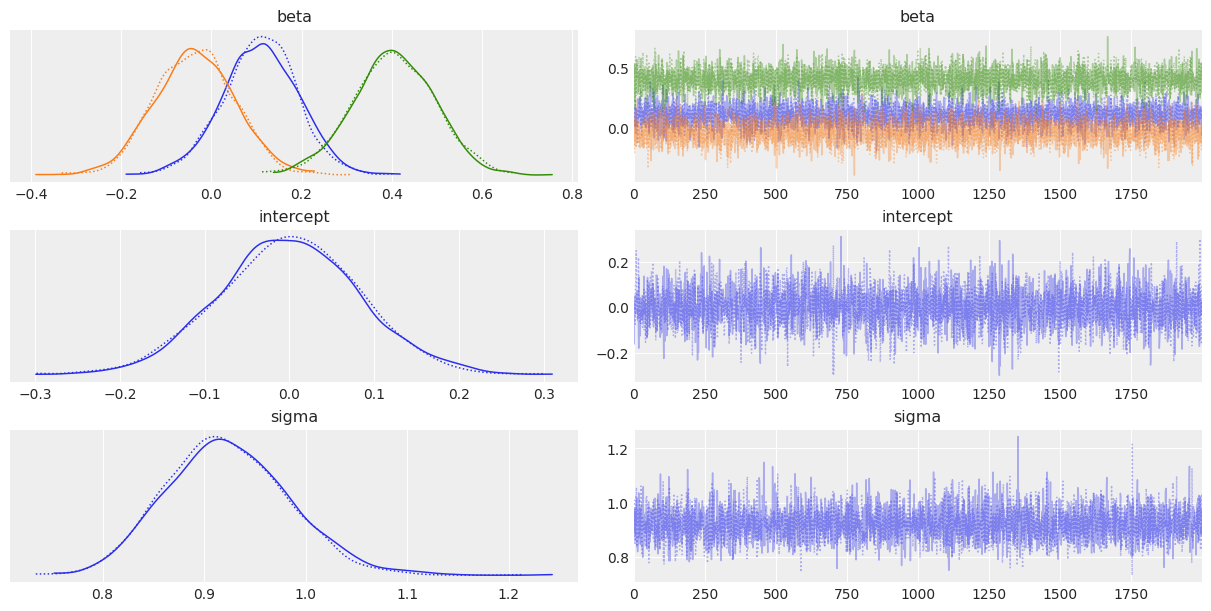

In [341]:
import arviz as az
az.plot_trace(trace)
az.summary(trace)

In [342]:
az.summary(trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.108,0.083,-0.043,0.270,0.001,0.001,4932.0,2728.0,1.0
beta[1],-0.037,0.089,-0.206,0.122,0.001,0.001,4196.0,2932.0,1.0
beta[2],0.404,0.091,0.227,0.572,0.001,0.001,4418.0,2892.0,1.0
intercept,0.000,0.084,-0.154,0.163,0.001,0.001,3607.0,3121.0,1.0
sigma,0.923,0.060,0.817,1.035,0.001,0.001,4273.0,2824.0,1.0


In [343]:
channel_effects = trace.posterior["beta"].mean(dim=["chain", "draw"]).values
roi = channel_effects * (y_std / X_std)  # Convert scaled impact to actual
roi_df = pd.DataFrame(roi, index=channels, columns=["ROI"])
print(roi_df)


                               ROI
Email Spends          1.453932e+06
Modular Video Spends -3.825983e+05
Paid Social Spends    4.904555e+06


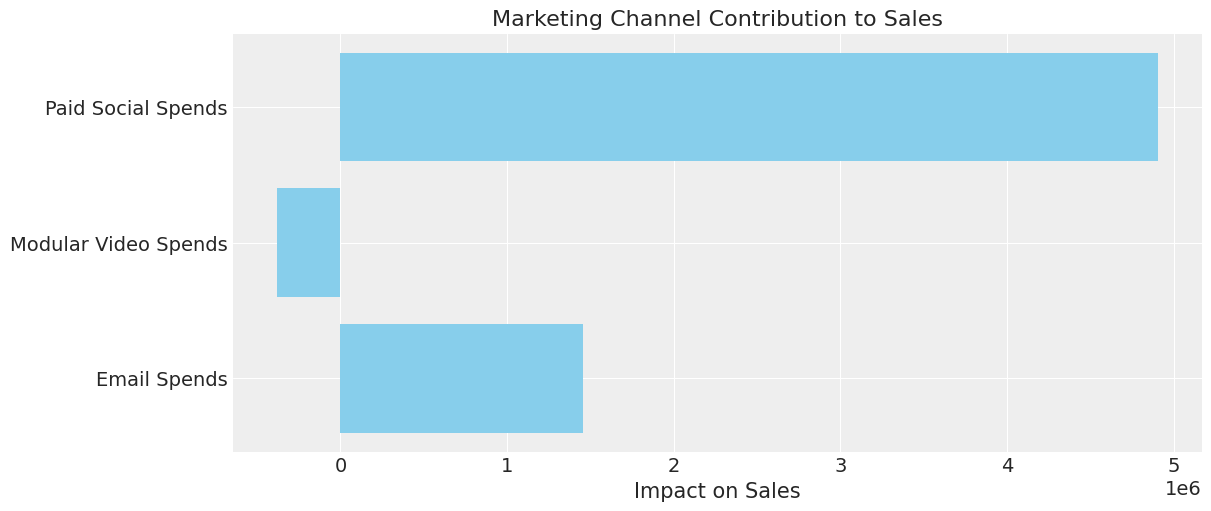

In [344]:
import matplotlib.pyplot as plt

plt.barh(channels, roi.flatten(), color="skyblue")
plt.xlabel("Impact on Sales")
plt.title("Marketing Channel Contribution to Sales")
plt.show()


Output()

Output()

Output()

Training R² Score: 0.193
Test R² Score: 0.093
Test MAPE: 7.18%
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]    0.075  0.096  -0.103    0.256      0.001    0.001    4194.0   
beta[1]   -0.035  0.099  -0.219    0.148      0.002    0.002    3794.0   
beta[2]    0.426  0.102   0.246    0.629      0.002    0.001    4252.0   
intercept  0.000  0.094  -0.169    0.179      0.001    0.001    5035.0   
sigma      0.923  0.068   0.800    1.052      0.001    0.001    4159.0   

           ess_tail  r_hat  
beta[0]      3371.0    1.0  
beta[1]      2449.0    1.0  
beta[2]      3166.0    1.0  
intercept    3251.0    1.0  
sigma        3038.0    1.0  
                               ROI
Channel                           
Email Spends          9.983940e+05
Modular Video Spends -3.429919e+05
Paid Social Spends    5.264565e+06


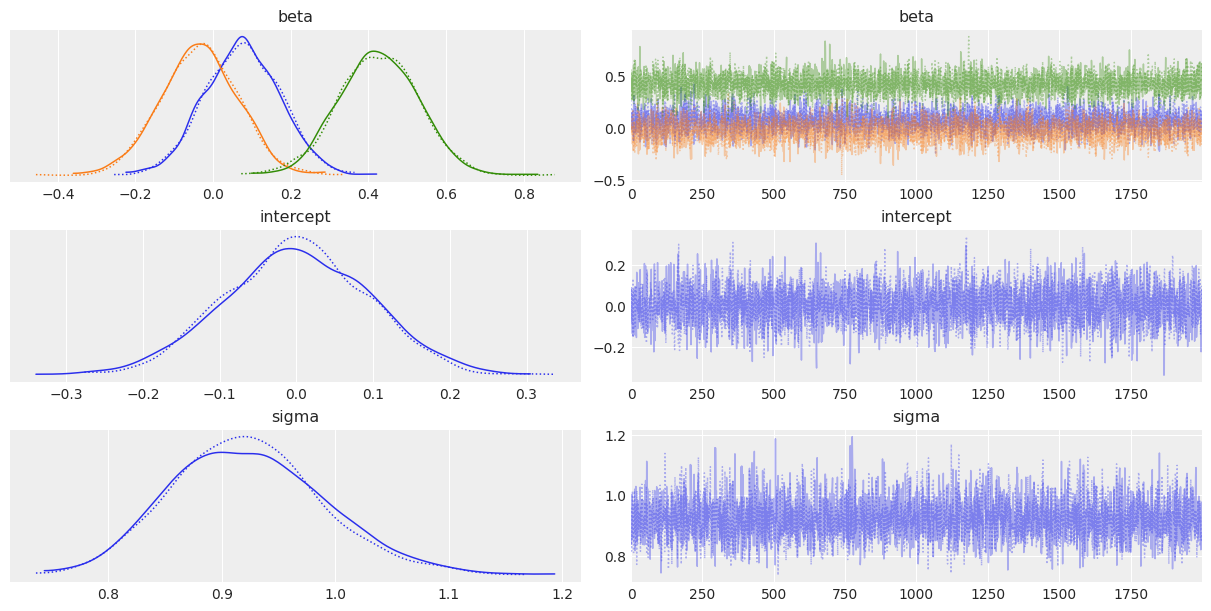

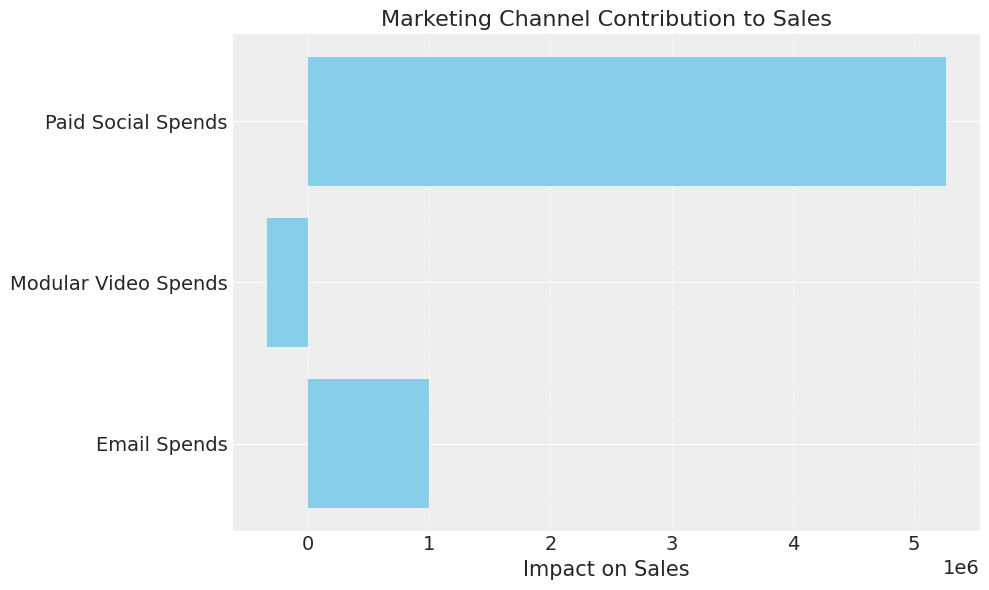

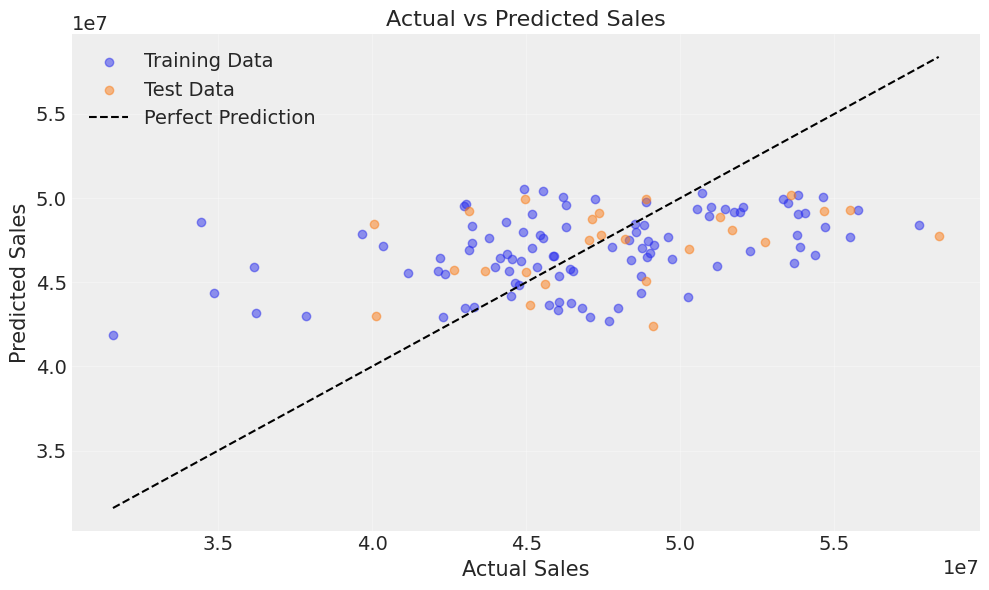

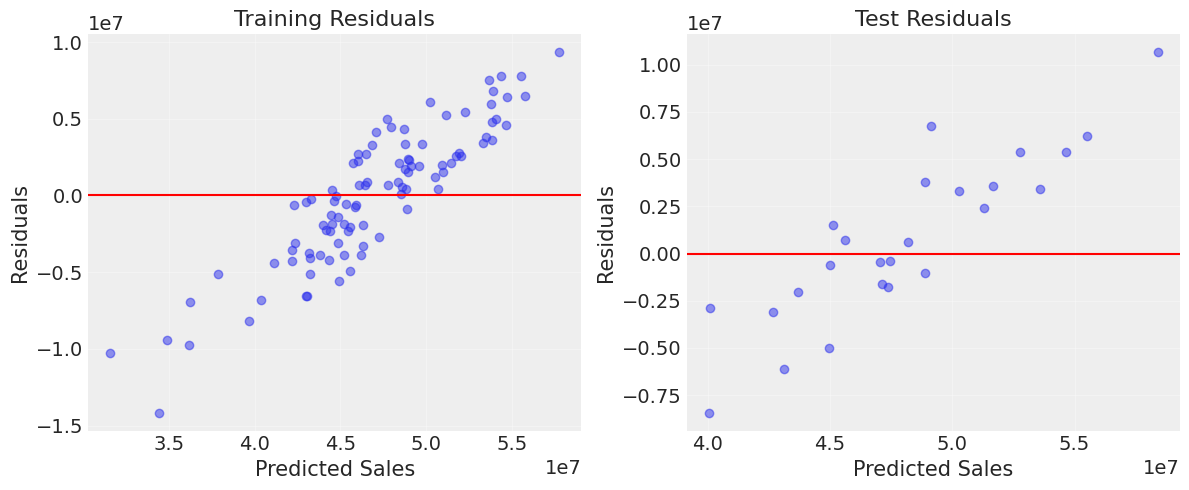


Marketing Channel Attribution:
                        ROI  Attribution %
Channel                                   
Email          9.983940e+05      15.113556
Modular Video -3.429919e+05       5.192166
Paid Social    5.264565e+06      79.694279


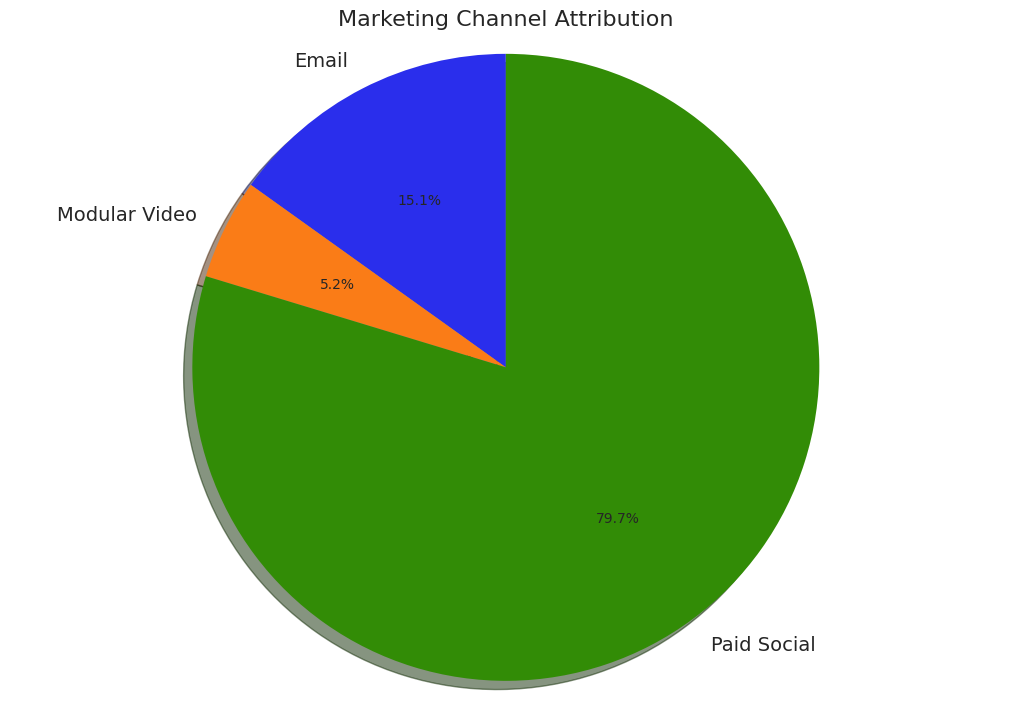

In [350]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Convert numeric columns (handling commas)
def clean_numeric_column(col):
    return pd.to_numeric(col.astype(str).str.replace(",", ""), errors='coerce')

numeric_columns = [
    "Sales", "Email Spends", "Modular Video Spends", "Paid Social Spends"
]
for col in numeric_columns:
    data[col] = clean_numeric_column(data[col])

# Apply log transformation to handle diminishing returns
for col in ["Email Spends", "Modular Video Spends", "Paid Social Spends"]:
    data[f"log_{col}"] = np.log1p(data[col])  # log(1 + x) to avoid log(0)

# Select final features
X = data[[f"log_{col}" for col in ["Email Spends", "Modular Video Spends", "Paid Social Spends"]]].values
y = data["Sales"].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
y_mean, y_std = y_train.mean(), y_train.std()
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)

y_train_scaled = (y_train - y_mean) / y_std
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std  # Normalize test set using train stats

# Bayesian Marketing Mix Model
# Bayesian Marketing Mix Model
with pm.Model() as mmm_model:
    # Define a data container for features (allows for swapping in test data later)
    X_shared = pm.MutableData("X_shared", X_train_scaled)
    y_shared = pm.MutableData("y_shared", y_train_scaled)

    # Priors for coefficients (beta) and intercept
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_train_scaled.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    # Expected sales (linear regression formula)
    mu = intercept + pm.math.dot(X_shared, beta)

    # Likelihood (observed data)
    sigma = pm.HalfNormal("sigma", sigma=1)
    # Use y_shared as the observed data, not y_train_scaled directly
    sales = pm.Normal("sales", mu=mu, sigma=sigma, observed=y_shared)

    # Run MCMC sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

# Generate Posterior Predictive Samples
with mmm_model:
    # Create posterior predictive for training data
    ppc = pm.sample_posterior_predictive(trace)

# Extract training predictions
y_pred_scaled = ppc.posterior_predictive["sales"].mean(axis=(0, 1))  # Mean across chains and draws
y_pred = (y_pred_scaled * y_std) + y_mean  # Convert back to original scale

# Make predictions for test set
with mmm_model:
    # Update the features for test data
    pm.set_data({"X_shared": X_test_scaled})

    # Create an empty array with the same shape (1D) as the original y_shared
    # but with length matching X_test_scaled
    dummy_y = np.zeros(X_test_scaled.shape[0])
    pm.set_data({"y_shared": dummy_y})

    # Sample from posterior predictive for test data
    test_ppc = pm.sample_posterior_predictive(trace)

# Process test predictions
test_pred_scaled = test_ppc.posterior_predictive["sales"].mean(axis=(0, 1))
test_pred = (test_pred_scaled * y_std) + y_mean

# Compute R² Score for training data
r2_train = r2_score(y_train, y_pred)
print(f"Training R² Score: {r2_train:.3f}")

# Compute R² Score for test data
r2_test = r2_score(y_test, test_pred)
print(f"Test R² Score: {r2_test:.3f}")

# Compute Mean Absolute Percentage Error (MAPE) for test data
mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100
print(f"Test MAPE: {mape:.2f}%")

# Plot trace to check parameter distributions
az.plot_trace(trace)

# Print summary of model parameters
print(az.summary(trace))

# Visualize impact of each marketing channel
channel_effects = trace.posterior["beta"].mean(dim=["chain", "draw"]).values
roi = channel_effects * (y_std / X_std)  # Convert scaled impact to actual

roi_df = pd.DataFrame({
    "ROI": roi,
    "Channel": ["Email Spends", "Modular Video Spends", "Paid Social Spends"]
}).set_index("Channel")
print(roi_df)

# Plot the contributions
plt.figure(figsize=(10, 6))
plt.barh(["Email Spends", "Modular Video Spends", "Paid Social Spends"], roi, color="skyblue")
plt.xlabel("Impact on Sales")
plt.title("Marketing Channel Contribution to Sales")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5, label="Training Data")
plt.scatter(y_test, test_pred, alpha=0.5, label="Test Data")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', label="Perfect Prediction")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and plot residuals
train_residuals = y_train - y_pred
test_residuals = y_test - test_pred

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Training Residuals")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Test Residuals")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

total_impact = np.abs(roi).sum()
attribution_pct = np.abs(roi) / total_impact * 100

attribution_df = pd.DataFrame({
    "ROI": roi,
    "Attribution %": attribution_pct,
    "Channel": ["Email", "Modular Video", "Paid Social"]
})

print("\nMarketing Channel Attribution:")
print(attribution_df.set_index("Channel"))

plt.figure(figsize=(10, 7))
plt.pie(attribution_pct, labels=["Email", "Modular Video", "Paid Social"],
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title("Marketing Channel Attribution")
plt.show()